# Creating a Filter, Edge Detection

### Import resources and display image

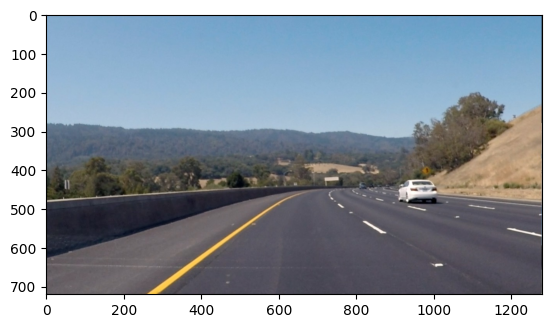

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

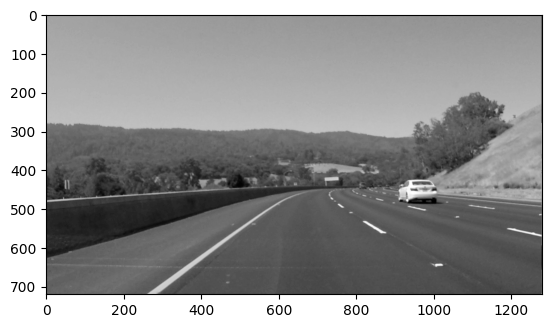

In [4]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

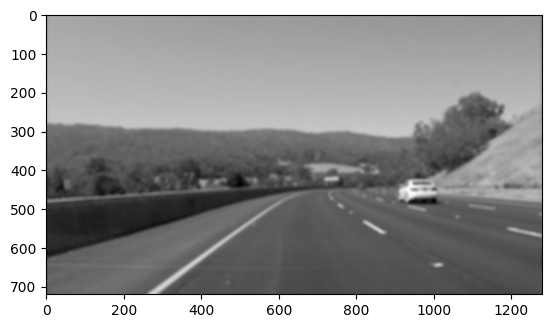

In [59]:
from scipy.stats import multivariate_normal
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

blur = np.full((8,8), 1/8**2)

def gaussian_filter(kernel_size = 5):
    x = y = np.linspace(-1, 1, kernel_size)
    xv, yv = np.meshgrid(x, y)
    coordinates = np.zeros(xv.shape + (2,))
    coordinates[:, :, 0] = xv
    coordinates[:, :, 1] = yv
    gaussian_2d = multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]])
    coordinates = gaussian_2d.pdf(coordinates)
    return coordinates / coordinates.sum()
gaussian_blur = gaussian_filter(11)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, gaussian_blur)

plt.imshow(filtered_image, cmap='gray');

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



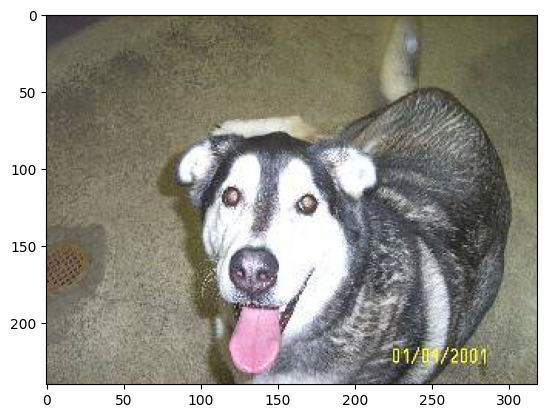

In [160]:
dog = mpimg.imread('data/dog.jpg')
plt.imshow(dog);

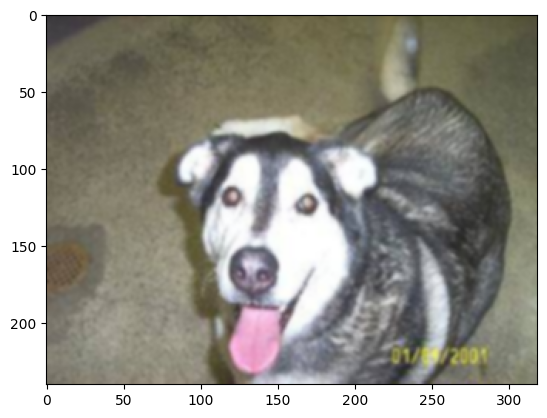

In [164]:
blur_image = cv2.GaussianBlur(dog, (5, 5), 0)

plt.imshow(blur_image, cmap='gray');